In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')

In [3]:
import torch
torch.manual_seed(123)

In [4]:
from transform import get_transforms
from dataset import get_data_loader

train_transforms, test_transforms = get_transforms()
train_data, test_data = get_data_loader(train_transforms, test_transforms, batch_size=512)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

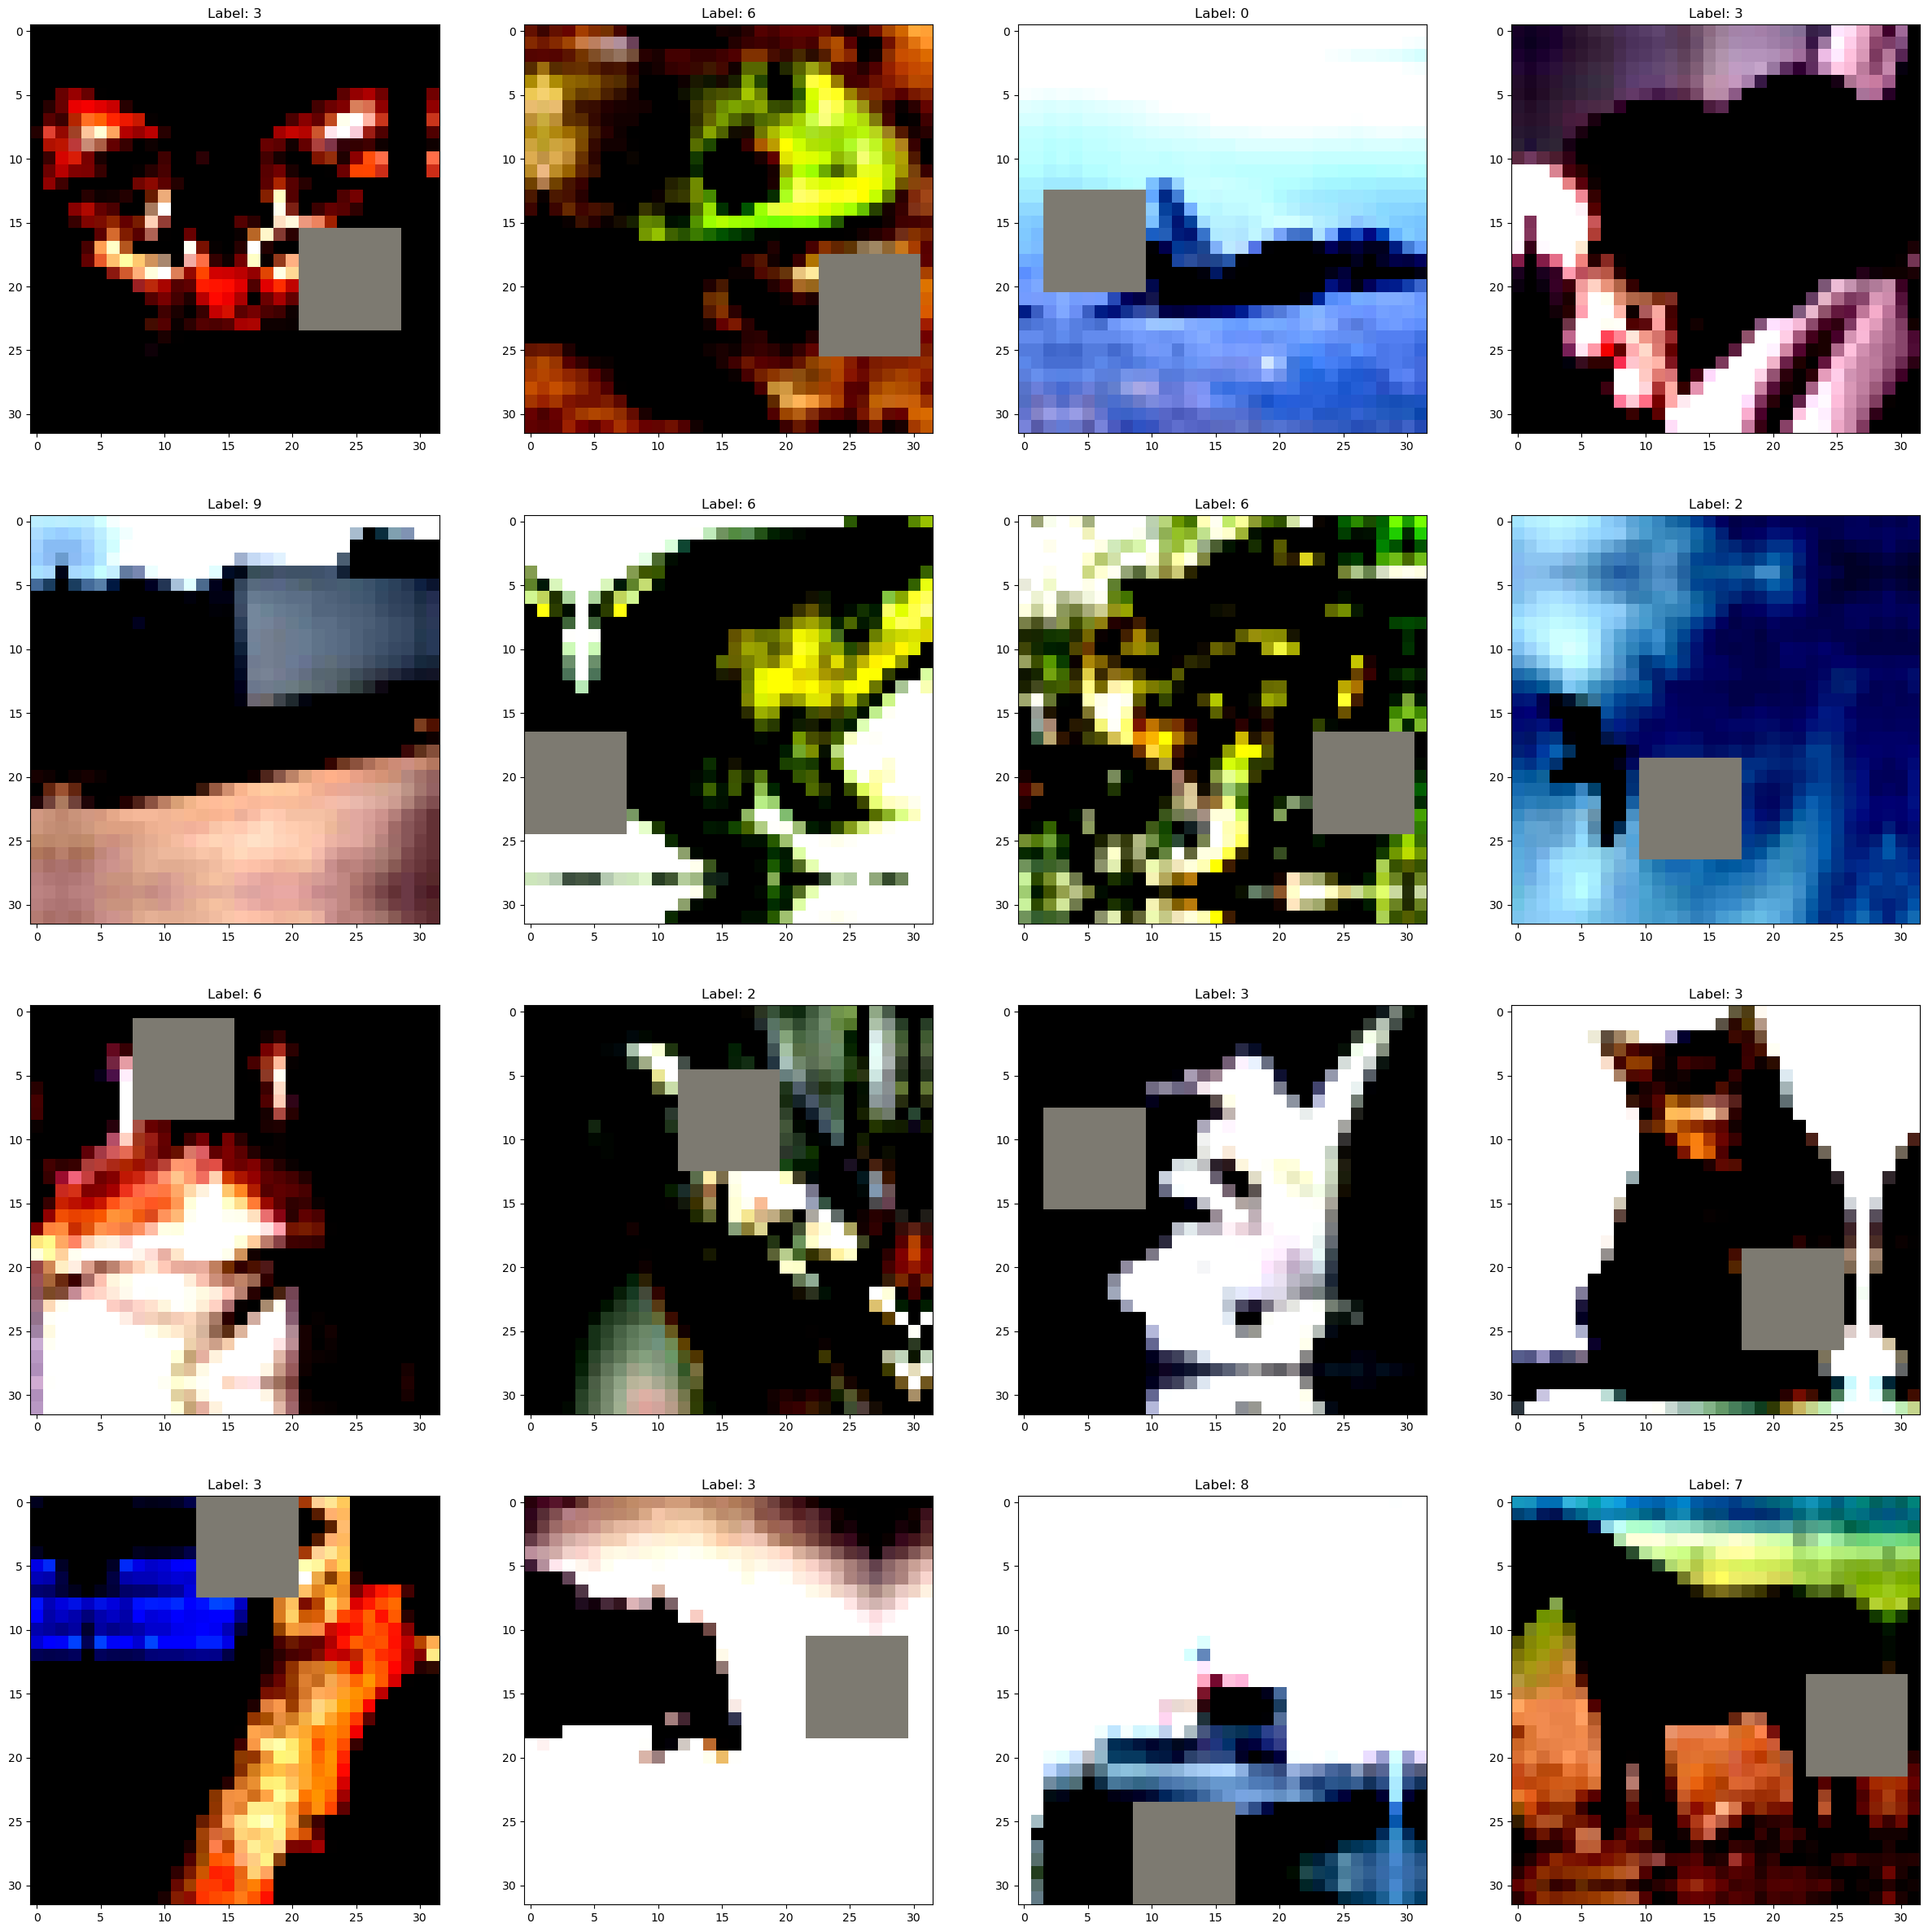

In [5]:
from visualize import print_samples

print_samples(train_data)

In [6]:
from model import BaseNet
from model_utils import test, train
from utils import print_model_summary, get_device
device = get_device()
model = BaseNet()
print_model_summary(model)

Device Type - mps
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 32, 32]          73,728
       BatchNorm2d-9          [-1, 128, 32, 32]             256
             ReLU-10          [-1, 128, 32, 32]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14 

 49%|████▉     | 49/100 [00:33<00:35,  1.46it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.60E-04


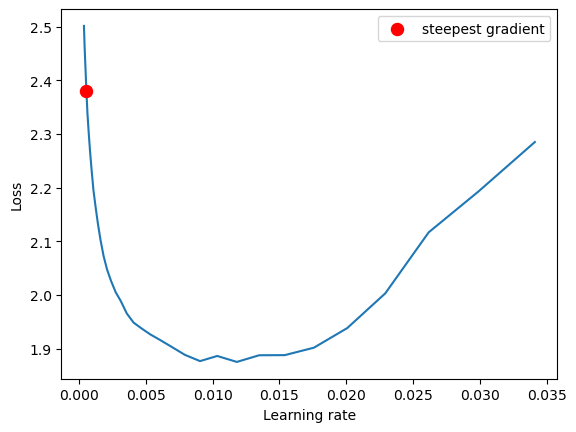

In [12]:
from model_utils import plot_lr
import torch.optim as optim

model =  BaseNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
plot_lr(model, optimizer, train_data)

In [15]:
from torch.optim.lr_scheduler import OneCycleLR
import torch.nn as nn

EPOCHS = 24
model =  BaseNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
scheduler = OneCycleLR(
    optimizer,
    max_lr= 5.60E-04,
    total_steps= EPOCHS * len(train_data),
    pct_start=10/EPOCHS,
    div_factor=5,
    final_div_factor=10,
    anneal_strategy='cos'
)

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_data, optimizer, criterion, scheduler)
    test(model, device, test_data, criterion)

EPOCH: 0


Loss=1.1059693098068237 Batch_id=97 Accuracy=47.56: 100%|██████████| 98/98 [01:06<00:00,  1.47it/s]



Test set: Average loss: 0.0023, Accuracy: 5969/10000 (59.69%)

EPOCH: 1


Loss=1.0868940353393555 Batch_id=97 Accuracy=62.08: 100%|██████████| 98/98 [01:09<00:00,  1.41it/s]



Test set: Average loss: 0.0019, Accuracy: 6584/10000 (65.84%)

EPOCH: 2


Loss=0.8549976348876953 Batch_id=97 Accuracy=68.24: 100%|██████████| 98/98 [01:06<00:00,  1.47it/s]



Test set: Average loss: 0.0017, Accuracy: 7063/10000 (70.63%)

EPOCH: 3


Loss=0.7599791288375854 Batch_id=97 Accuracy=72.48: 100%|██████████| 98/98 [01:06<00:00,  1.47it/s]



Test set: Average loss: 0.0016, Accuracy: 7194/10000 (71.94%)

EPOCH: 4


Loss=0.7605128288269043 Batch_id=97 Accuracy=75.77: 100%|██████████| 98/98 [01:06<00:00,  1.46it/s]



Test set: Average loss: 0.0017, Accuracy: 7063/10000 (70.63%)

EPOCH: 5


Loss=0.6746052503585815 Batch_id=97 Accuracy=78.12: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s]



Test set: Average loss: 0.0013, Accuracy: 7704/10000 (77.04%)

EPOCH: 6


Loss=0.5972921848297119 Batch_id=97 Accuracy=79.59: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s]



Test set: Average loss: 0.0016, Accuracy: 7404/10000 (74.04%)

EPOCH: 7


Loss=0.5135405659675598 Batch_id=97 Accuracy=80.56: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s] 



Test set: Average loss: 0.0014, Accuracy: 7669/10000 (76.69%)

EPOCH: 8


Loss=0.4374799132347107 Batch_id=97 Accuracy=81.81: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s] 



Test set: Average loss: 0.0012, Accuracy: 8037/10000 (80.37%)

EPOCH: 9


Loss=0.4459869861602783 Batch_id=97 Accuracy=82.96: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s] 



Test set: Average loss: 0.0013, Accuracy: 7682/10000 (76.82%)

EPOCH: 10


Loss=0.49106088280677795 Batch_id=97 Accuracy=83.67: 100%|██████████| 98/98 [01:07<00:00,  1.45it/s]



Test set: Average loss: 0.0010, Accuracy: 8250/10000 (82.50%)

EPOCH: 11


Loss=0.4557018280029297 Batch_id=97 Accuracy=84.19: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s] 



Test set: Average loss: 0.0012, Accuracy: 7985/10000 (79.85%)

EPOCH: 12


Loss=0.364139586687088 Batch_id=97 Accuracy=85.08: 100%|██████████| 98/98 [01:06<00:00,  1.46it/s]  



Test set: Average loss: 0.0010, Accuracy: 8269/10000 (82.69%)

EPOCH: 13


Loss=0.4222365915775299 Batch_id=97 Accuracy=85.75: 100%|██████████| 98/98 [01:06<00:00,  1.47it/s] 



Test set: Average loss: 0.0010, Accuracy: 8384/10000 (83.84%)

EPOCH: 14


Loss=0.46974092721939087 Batch_id=97 Accuracy=86.62: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s]



Test set: Average loss: 0.0010, Accuracy: 8310/10000 (83.10%)

EPOCH: 15


Loss=0.3578134775161743 Batch_id=97 Accuracy=87.75: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s] 



Test set: Average loss: 0.0009, Accuracy: 8570/10000 (85.70%)

EPOCH: 16


Loss=0.3167576491832733 Batch_id=97 Accuracy=88.29: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s] 



Test set: Average loss: 0.0010, Accuracy: 8383/10000 (83.83%)

EPOCH: 17


Loss=0.32601669430732727 Batch_id=97 Accuracy=89.70: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s]



Test set: Average loss: 0.0009, Accuracy: 8527/10000 (85.27%)

EPOCH: 18


Loss=0.30948832631111145 Batch_id=97 Accuracy=90.86: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s]



Test set: Average loss: 0.0007, Accuracy: 8724/10000 (87.24%)

EPOCH: 19


Loss=0.21804441511631012 Batch_id=97 Accuracy=92.04: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s]



Test set: Average loss: 0.0007, Accuracy: 8845/10000 (88.45%)

EPOCH: 20


Loss=0.22178393602371216 Batch_id=97 Accuracy=93.32: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s]



Test set: Average loss: 0.0006, Accuracy: 9034/10000 (90.34%)

EPOCH: 21


Loss=0.1597922146320343 Batch_id=97 Accuracy=94.62: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s] 



Test set: Average loss: 0.0005, Accuracy: 9153/10000 (91.53%)

EPOCH: 22


Loss=0.17399175465106964 Batch_id=97 Accuracy=95.53: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s]



Test set: Average loss: 0.0005, Accuracy: 9206/10000 (92.06%)

EPOCH: 23


Loss=0.14101946353912354 Batch_id=97 Accuracy=95.98: 100%|██████████| 98/98 [01:07<00:00,  1.46it/s]



Test set: Average loss: 0.0005, Accuracy: 9230/10000 (92.30%)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Total Incorrect Predictions 770


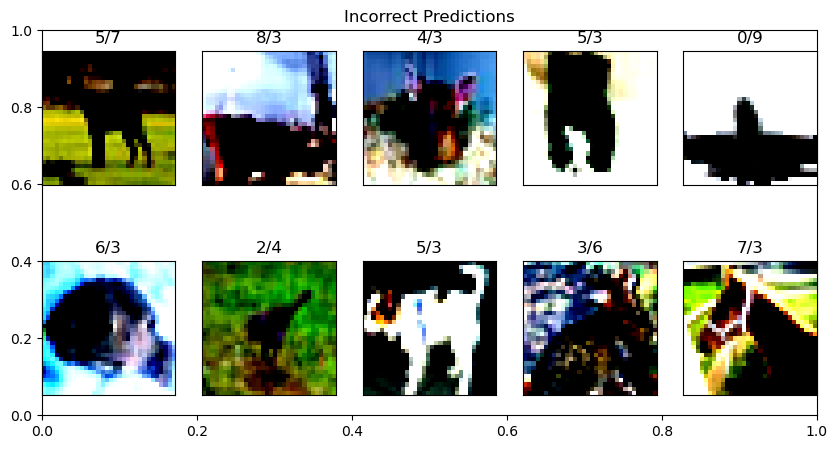

In [16]:
from model_utils import get_incorrrect_predictions
from visualize import plot_incorrect_predictions

preds = get_incorrrect_predictions(model, test_data, device)
plot_incorrect_predictions(preds, [], "Incorrect Predictions")